In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [3]:
waypoints = pd.read_csv('../data/trajectories/waypoints.csv', delimiter=";").to_numpy()
path = pd.read_csv('../data/trajectories/optimal_path.csv', delimiter=";").to_numpy()
headings = pd.read_csv('../data/trajectories/optimal_heading.csv', delimiter=";").to_numpy()

In [4]:
waypoints.shape
waypoints[0:5]

array([[-2.61245200e+02, -1.35059600e+02, -3.93957482e-01],
       [-2.89703155e+02, -2.39332630e+01, -1.11487485e-01],
       [-3.49733639e+02,  7.32813039e+01, -5.93022629e-01],
       [-4.13602499e+02,  1.66594920e+02, -9.16672210e-01],
       [-5.06220236e+02,  2.34154537e+02, -4.22435036e-01]])

In [19]:
path[0,0]

-261.2452

<Axes: >

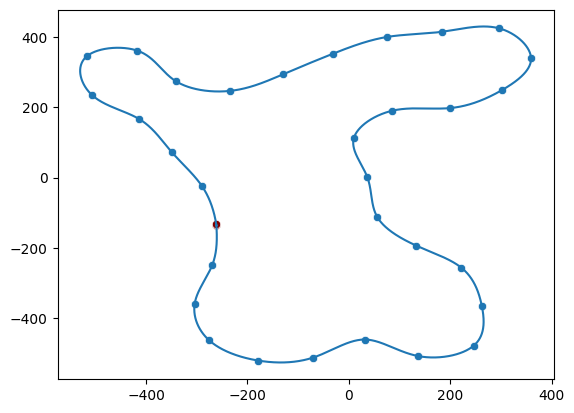

In [26]:
sns.lineplot(x=path[:,0], y=path[:,1], sort=False)
sns.scatterplot(x=waypoints[:,0], y=waypoints[:,1])
sns.scatterplot(x=path[0:4,0], y=path[0:4,1], color="maroon")

In [6]:
headings[0:5]

array([[-0.105598,  0.994409],
       [-0.107282,  0.994229],
       [-0.108977,  0.994044],
       [-0.110682,  0.993856],
       [-0.112397,  0.993663]])

<Axes: >

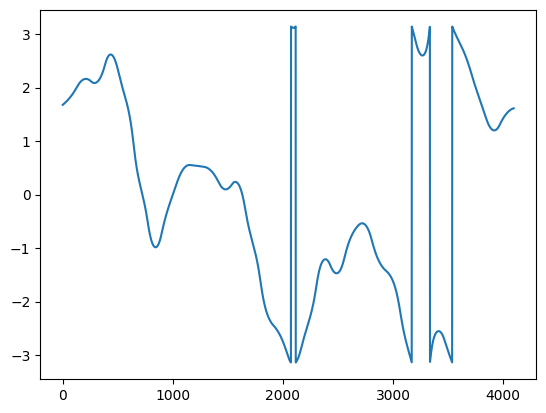

In [12]:
angles = np.angle(headings[:,0] + headings[:,1] * 1j)
sns.lineplot(angles)

<Axes: ylabel='Count'>

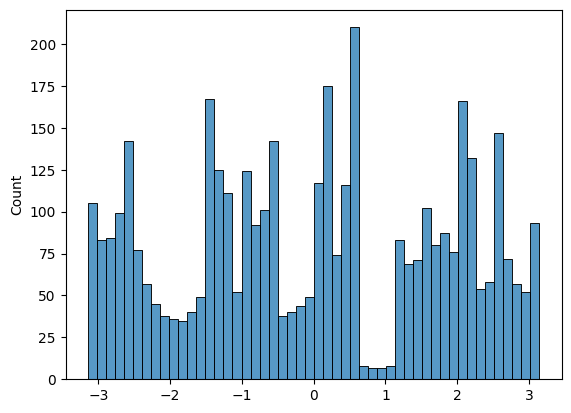

In [28]:
sns.histplot(angles, bins=50)

In [7]:
def relative_headings(path, headings, waypoints, skip=1):

    num_headings = path.shape[0]
    num_waypoints = waypoints.shape[0]

    headings_per_waypoint = int(num_headings / num_waypoints)

    # Shift the entire array of waypoints to the one that influences gaze.
    # Default is to skip 1 (the next waypoint after the immediate one).
    waypoints = np.roll(waypoints, shift=-skip)

    relative_headings = np.zeros(num_headings, dtype=np.float32)

    for i in range(num_headings):
        waypoint_id = np.floor(i / headings_per_waypoint)
        absolute_heading = waypoints[int(waypoint_id)] - path[i]
        relative_headings[i] = np.dot(headings[i], absolute_heading) / (np.linalg.norm(headings[i]) * np.linalg.norm(absolute_heading))

    return relative_headings

In [8]:
n1_headings = relative_headings(path=path, headings=headings, waypoints=waypoints[:,0:2])
n0_headings = relative_headings(path=path, headings=headings, waypoints=waypoints[:,0:2], skip=0)

/tmp/ipykernel_15290/2604427231.py:17: RuntimeWarning: invalid value encountered in scalar divide
  relative_headings[i] = np.dot(headings[i], absolute_heading) / (np.linalg.norm(headings[i]) * np.linalg.norm(absolute_heading))


<Axes: ylabel='Count'>

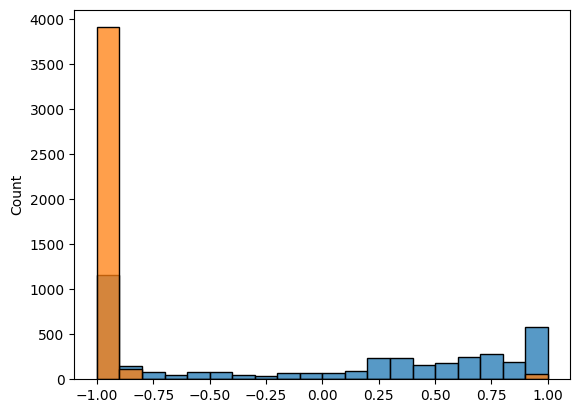

In [9]:
sns.histplot(n1_headings, bins=20)
sns.histplot(n0_headings, bins=20)

In [ ]:
# Need to do a hierarchical regression.
